## Importing the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Importing the dataset

In [3]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train[:2])

[[1.185e+01 1.746e+01 7.554e+01 4.327e+02 8.372e-02 5.642e-02 2.688e-02
  2.280e-02 1.875e-01 5.715e-02 2.070e-01 1.238e+00 1.234e+00 1.388e+01
  7.595e-03 1.500e-02 1.412e-02 8.578e-03 1.792e-02 1.784e-03 1.306e+01
  2.575e+01 8.435e+01 5.178e+02 1.369e-01 1.758e-01 1.316e-01 9.140e-02
  3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 3.873e+02 1.054e-01 6.779e-02 5.006e-03
  7.583e-03 1.940e-01 6.028e-02 2.976e-01 1.966e+00 1.959e+00 1.962e+01
  1.289e-02 1.104e-02 3.297e-03 4.967e-03 4.243e-02 1.963e-03 1.198e+01
  2.578e+01 7.691e+01 4.361e+02 1.424e-01 9.669e-02 1.335e-02 2.022e-02
  3.292e-01 6.522e-02]]


In [9]:
print(y_train[:2])

[1 1]


In [10]:
print(X_test[:2])

[[1.340e+01 2.052e+01 8.864e+01 5.567e+02 1.106e-01 1.469e-01 1.445e-01
  8.172e-02 2.116e-01 7.325e-02 3.906e-01 9.306e-01 3.093e+00 3.367e+01
  5.414e-03 2.265e-02 3.452e-02 1.334e-02 1.705e-02 4.005e-03 1.641e+01
  2.966e+01 1.133e+02 8.444e+02 1.574e-01 3.856e-01 5.106e-01 2.051e-01
  3.585e-01 1.109e-01]
 [1.321e+01 2.525e+01 8.410e+01 5.379e+02 8.791e-02 5.205e-02 2.772e-02
  2.068e-02 1.619e-01 5.584e-02 2.084e-01 1.350e+00 1.314e+00 1.758e+01
  5.768e-03 8.082e-03 1.510e-02 6.451e-03 1.347e-02 1.828e-03 1.435e+01
  3.423e+01 9.129e+01 6.329e+02 1.289e-01 1.063e-01 1.390e-01 6.005e-02
  2.444e-01 6.788e-02]]


In [11]:
print(y_test[:2])

[0 1]


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train[:2])

[[-0.65079907 -0.43057322 -0.68024847 -0.62698309 -0.91381897 -0.93335153
  -0.78763077 -0.67944444  0.25404078 -0.79877182 -0.68958948  0.04723809
  -0.78036299 -0.55337361  0.21546423 -0.59450332 -0.55964264 -0.52889336
  -0.30718648 -0.73414209 -0.6661438   0.01849243 -0.68117939 -0.63150142
   0.19196229 -0.50775064 -0.69592933 -0.36433881  0.32349851 -0.7578486 ]
 [-0.82835341  0.15226547 -0.82773762 -0.75309358  0.65281216 -0.70875266
  -1.06654609 -1.07190884  0.48903741 -0.34145374 -0.37372313  1.38156616
  -0.42829675 -0.43492182  2.09091025 -0.82810471 -0.90419591 -1.14032681
   2.68441903 -0.66600912 -0.88704517  0.02344492 -0.90048554 -0.77100112
   0.43210093 -1.02916891 -1.29277423 -1.45036679  0.62563098 -1.03071387]]


In [14]:
print(X_test[:2])

[[-0.21395901  0.3125461  -0.14355187 -0.28254034  1.0285724   0.85395767
   0.71214153  0.84017194  1.12533599  1.55356719 -0.04948946 -0.5161856
   0.1223834  -0.14498321 -0.55702826 -0.14322791  0.08979712  0.27743345
  -0.41337566  0.11123962  0.01905951  0.66396802  0.17216914 -0.07384415
   1.08702447  0.87505243  1.21700274  1.37043754  1.08911166  1.53928319]
 [-0.26750714  1.461224   -0.32955207 -0.33476231 -0.61104293 -1.01967493
  -0.77691993 -0.73412175 -0.67148442 -0.99017332 -0.68470854  0.25251933
  -0.7415143  -0.47701967 -0.43164433 -1.00259787 -0.52844407 -0.88904815
  -0.85033804 -0.71739432 -0.40228939  1.41839857 -0.47661156 -0.43497248
  -0.15733026 -0.96582888 -0.6585792  -0.84266106 -0.71577388 -0.88105993]]


# Logistic Regression

## Training the Logistic Regression model on the Training set

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)
pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted', 'Actual'])

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


## Making the Confusion Matrix

Classification Report for Logistic Regression


              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        53
      benign       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



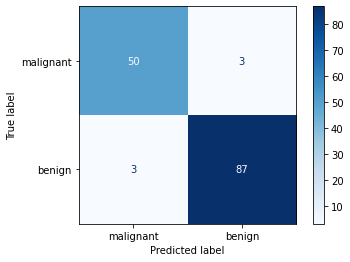

In [24]:
#plot
print(f"Classification Report for Logistic Regression\n\n")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))
plot_confusion_matrix(classifiesr, X_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()  

# K-Nearest Neighbors (K-NN)

## Training the K-NN model on the Training set

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [28]:
y_pred = classifier.predict(X_test)
pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted', 'Actual'])

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


## Making the Confusion Matrix

Classification Report for KNN


              precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        53
      benign       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



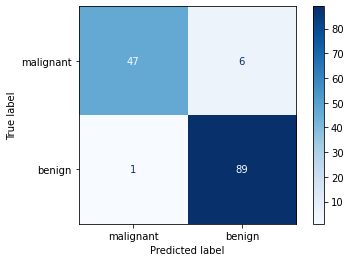

In [30]:
#plot
print(f"Classification Report for KNN\n\n")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()  

# Support Vector Machine (SVM)

## Training the SVM model on the Training set

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting the Test set results

In [35]:
y_pred = classifier.predict(X_test)
pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted', 'Actual'])

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


## Making the Confusion Matrix

Classification Report for SVM


              precision    recall  f1-score   support

   malignant       0.93      0.96      0.94        53
      benign       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



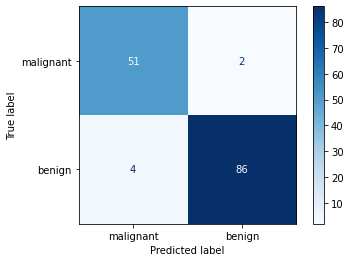

In [45]:
#plot
print(f"Classification Report for SVM\n\n")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()  

# Naive Bayes

## Training the Naive Bayes model on the Training set

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [38]:
y_pred = classifier.predict(X_test)
pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted', 'Actual'])

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


## Making the Confusion Matrix

Classification Report for Naive Bayes


              precision    recall  f1-score   support

   malignant       0.93      0.96      0.94        53
      benign       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



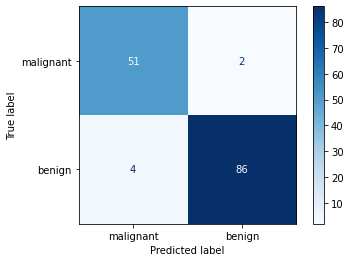

In [44]:
#plot
print(f"Classification Report for Naive Bayes\n\n")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()  

# Decision Tree Classification

## Training the Decision Tree Classification model on the Training set

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [41]:
y_pred = classifier.predict(X_test)
pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted', 'Actual'])

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


## Making the Confusion Matrix

Classification Report for Decision Tree Classification


              precision    recall  f1-score   support

   malignant       0.93      0.96      0.94        53
      benign       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



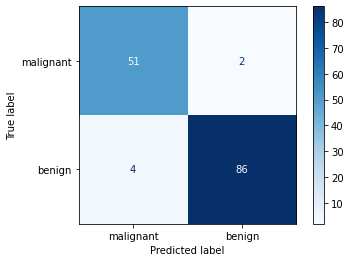

In [43]:
#plot
print(f"Classification Report for Decision Tree Classification\n\n")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()  

# Random Forest Classification

## Training the Random Forest Classification model on the Training set

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [47]:
y_pred = classifier.predict(X_test)
pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted', 'Actual'])

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


## Making the Confusion Matrix

Classification Report for Random Forest Classification


              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        53
      benign       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



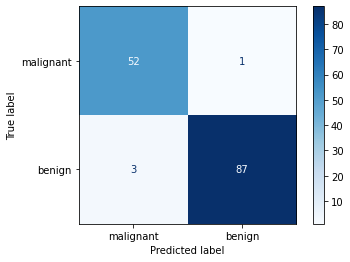

In [48]:
#plot
print(f"Classification Report for Random Forest Classification\n\n")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()  